# 날씨 데이터 분석 프로젝트

#### 분석 방법
**주요 분석 방법:**

1. **데이터 정제 및 조작**: 결측치 처리, 날짜 데이터 타입 변환 등의 기본적인 데이터 전처리 작업을 수행했습니다.
2. **기초 통계 분석**: 연도별, 월별 기온의 평균과 분포를 분석했습니다.
3. **이동 평균 분석**: 장기적인 기온 추세를 파악하기 위해 이동 평균을 계산하고 시각화했습니다.
4. **상자 그림 및 산점도 분석**: 계절적 패턴과 이상치를 식별하기 위한 시각화를 수행했습니다.

#### 주요 발견 사항

- **장기적인 기온 상승 추세**: 이동 평균 분석을 통해 장기적으로 기온이 상승하는 추세가 관찰되었습니다.
- **계절적 패턴의 식별**: 월별 평균 기온 분석을 통해 강력한 계절적 패턴이 확인되었습니다. 특히, 여름과 겨울 기간의 기온 차이가 두드러졌습니다.
- **이상치의 발견**: 산점도와 상자 그림 분석을 통해 몇몇 이상치가 식별되었습니다. 이들은 특별한 기후 현상이나 데이터 수집 오류일 수 있습니다.

## [1] 데이터 로드 및 전처리

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
data = pd.read_csv(url,parse_dates = ['Date'],index_col='Date')
# 'Date'열을 날짜로 파싱하도록 지정
# 'Date'열을 인덱스로 사용하도록 지정

In [3]:
data
# 'Date'열에 있는 값들은 날짜로 쓸 거니까 str로 받아도 date형으로 바꿔줘 = parse
# 그 날짜형으로 바꾼 'Date'를 인덱스화 시켜줘 = index_col

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [4]:
data.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [5]:
# 결측치가 있다면
if data.isnull().values.any():
    data.dropna(inplace=True)
# 해당 행을 삭제해

data.dtypes

Temp    float64
dtype: object

## [2] 기초 통계 분석

In [7]:
data.index.year
# 인덱스에서 연도만 추출

Index([1981, 1981, 1981, 1981, 1981, 1981, 1981, 1981, 1981, 1981,
       ...
       1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990],
      dtype='int32', name='Date', length=3650)

In [8]:
data.index.month
# 인덱스에서 월만 추출

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
      dtype='int32', name='Date', length=3650)

In [9]:
data['Year'] = data.index.year
data['Month'] = data.index.month

In [10]:
# 연도별 평균 기온 계산
yearly_avg_temp = data.groupby('Year')['Temp'].mean()
yearly_avg_temp

Year
1981    11.517260
1982    10.783562
1983    11.187397
1984    10.591781
1985    11.137534
1986    10.803288
1987    10.853151
1988    11.972055
1989    11.261918
1990    11.669589
Name: Temp, dtype: float64

In [11]:
# 월별 평균 기온 계산
monthly_avg_temp = data.groupby(['Year','Month'])['Temp'].mean()
monthly_avg_temp

Year  Month
1981  1        17.712903
      2        17.678571
      3        13.500000
      4        12.356667
      5         9.490323
                 ...    
1990  8         7.825806
      9         9.166667
      10       11.345161
      11       12.656667
      12       14.367742
Name: Temp, Length: 120, dtype: float64

In [12]:
monthly_avg_temp = data.groupby(['Year','Month'])['Temp'].mean().unstack()
monthly_avg_temp
# Year가 인덱스가 되고 Month가 컬럼으로 깔린다.

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1981,17.712903,17.678571,13.500000,12.356667,9.490323,7.306667,7.577419,7.238710,10.143333,10.087097,11.890000,13.680645
1982,16.567742,15.921429,14.935484,11.470000,9.583871,5.606667,4.641935,7.903226,7.280000,9.545161,12.486667,13.754839
1983,13.180645,16.807143,15.777419,10.596667,10.116129,6.600000,6.890323,8.706452,9.210000,10.312903,11.993333,14.396774
1984,14.309677,14.944828,12.867742,10.750000,8.112903,7.730000,5.987097,8.696774,8.046667,10.632258,12.623333,12.643333
1985,14.219355,14.032143,15.877419,12.976667,9.419355,7.073333,6.135484,7.635484,8.803333,10.490323,13.073333,14.109677
1986,13.825806,14.196429,14.690323,11.653333,10.274194,7.526667,6.961290,7.387097,8.933333,9.683871,11.793333,12.935484
1987,13.235484,13.889286,12.619355,12.250000,9.806452,8.273333,5.983871,8.022581,9.810000,10.238710,13.150000,13.254839
1988,16.493548,14.524138,14.748387,12.833333,11.387097,8.386667,8.232258,8.725806,9.883333,10.890323,12.253333,15.436667
1989,15.180645,16.371429,15.803226,12.563333,10.725806,6.560000,6.332258,6.770968,8.486667,9.867742,12.876667,13.951613


In [13]:
yearly_avg_temp.describe()

count    10.000000
mean     11.177753
std       0.439851
min      10.591781
25%      10.815753
50%      11.162466
75%      11.453425
max      11.972055
Name: Temp, dtype: float64

In [14]:
monthly_avg_temp.describe()

Month,1,2,3,4,5,6,7,8,9,10,11,12
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,15.030323,15.378325,14.565484,12.088333,9.866452,7.278333,6.692581,7.891290,8.976333,10.309355,12.479667,13.853161
std,1.538161,1.289242,1.191908,0.946615,0.868788,0.849353,1.112261,0.669329,0.880892,0.554985,0.485103,0.805986
min,13.180645,13.889286,12.619355,10.596667,8.112903,5.606667,4.641935,6.770968,7.280000,9.545161,11.793333,12.643333
25%,13.924194,14.278356,13.797581,11.515833,9.513710,6.718333,6.024194,7.449194,8.565833,9.922581,12.058333,13.361290
50%,14.745161,15.181342,14.791935,12.303333,9.777419,7.416667,6.611290,7.864516,9.050000,10.275806,12.555000,13.853226
75%,16.264516,16.258929,15.566935,12.765833,10.234677,7.727500,7.423387,8.528226,9.660000,10.596774,12.821667,14.303226
max,17.712903,17.678571,15.877419,13.433333,11.387097,8.386667,8.232258,8.725806,10.143333,11.345161,13.150000,15.436667


In [15]:
data.describe()

,Temp,Year,Month
count,3650.000000,3650.000000,3650.000000
mean,11.177753,1985.500000,6.520548
std,4.071837,2.872675,3.447566
min,0.000000,1981.000000,1.000000
25%,8.300000,1983.000000,4.000000
50%,11.000000,1985.500000,7.000000
75%,14.000000,1988.000000,10.000000
max,26.300000,1990.000000,12.000000


## [3] 이동 평균 분석

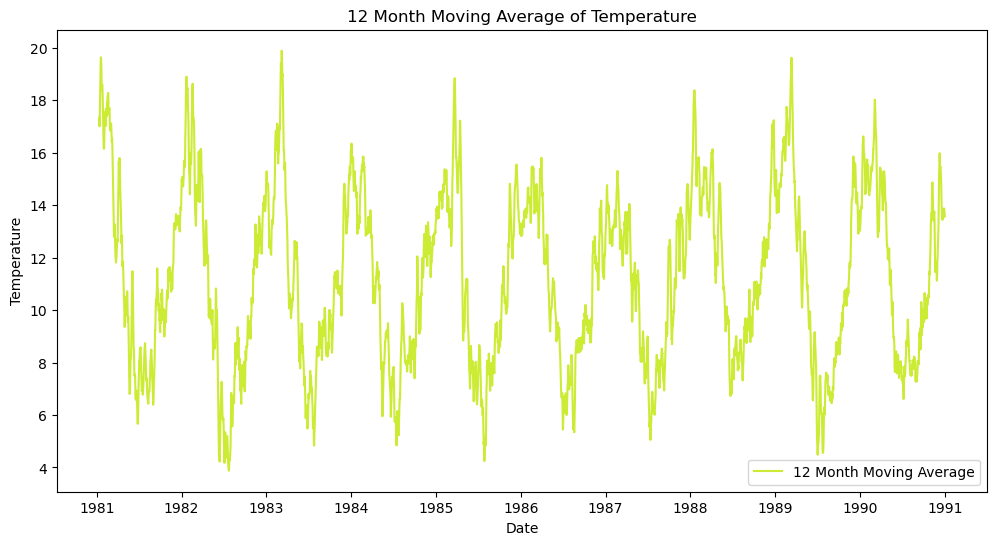

In [18]:
data['Moving_Avg'] = data['Temp'].rolling(window=12).mean()
# 꼭 date형식인 데이터에만 rolling을 쓸 수 있다.

plt.figure(figsize=(12,6))
plt.plot(data['Moving_Avg'], color='#cceb34',label='12 Month Moving Average')

plt.title('12 Month Moving Average of Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

### 👀 추세선

In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression
# X값으로 y값을 맞추는 선형회귀

In [22]:
yearly_moving_avg = data['Moving_Avg'].resample('Y').mean()
# 연도별로 한 개의 값만 나온다.
yearly_moving_avg

/var/folders/kn/qnjl17gs6tvgr8yxlz_6mfxc0000gn/T/ipykernel_3777/891820794.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_moving_avg = data['Moving_Avg'].resample('Y').mean()


Date
1981-12-31    11.366314
1982-12-31    10.776279
1983-12-31    11.179840
1984-12-31    10.622808
1985-12-31    11.148813
1986-12-31    10.797100
1987-12-31    10.847854
1988-12-31    11.969384
1989-12-31    11.277945
1990-12-31    11.661164
Freq: YE-DEC, Name: Moving_Avg, dtype: float64

In [21]:
data['Moving_Avg'].resample('M').mean()

/var/folders/kn/qnjl17gs6tvgr8yxlz_6mfxc0000gn/T/ipykernel_3777/182906588.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['Moving_Avg'].resample('M').mean()


Date
1981-01-31    18.097083
1981-02-28    17.491964
1981-03-31    14.156452
1981-04-30    13.168611
1981-05-31     9.086290
                ...    
1990-08-31     7.802151
1990-09-30     8.796389
1990-10-31    10.534946
1990-11-30    12.937500
1990-12-31    14.175538
Freq: ME, Name: Moving_Avg, Length: 120, dtype: float64

In [24]:
model = LinearRegression().fit(np.arange(len(yearly_moving_avg)).reshape(-1,1),yearly_moving_avg.values)
# 선형 회귀 모델을 만들었다.
trend = model.predict(np.arange(len(yearly_moving_avg)).reshape(-1,1))
# 추세를 파악할 수 있는 예측 모델을 만든다.

In [26]:
trend

array([10.8801192 , 10.9433705 , 11.00662181, 11.06987312, 11.13312442,
       11.19637573, 11.25962704, 11.32287834, 11.38612965, 11.44938096])

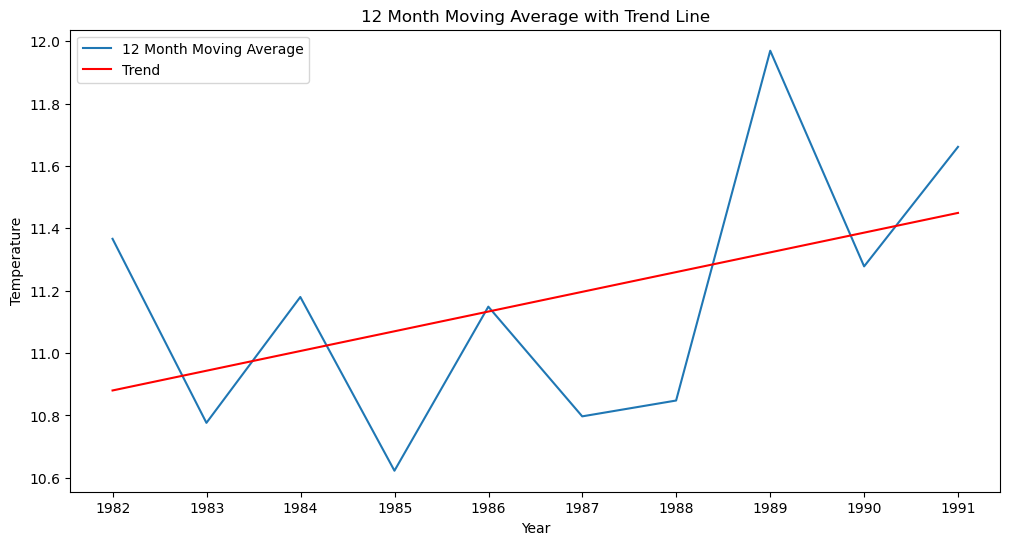

In [25]:
plt.figure(figsize=(12,6))
plt.plot(yearly_moving_avg.index, yearly_moving_avg.values, label='12 Month Moving Average')  
plt.plot(yearly_moving_avg.index, trend, label='Trend', color='red')  

plt.title('12 Month Moving Average with Trend Line') 
plt.xlabel('Year')  
plt.ylabel('Temperature')  

plt.legend()  
plt.show()  

In [27]:
# 연도별 평균 기온이 점점 오른다는 인사이트도 얻음.

### **12개월 이동 평균 계산 및 시각화**

이동 평균을 계산하는 이유는 단기적인 변동성을 줄이고, 데이터의 장기적인 추세를 보다 명확하게 파악하기 위함입니다. 여기서는 12개월 이동 평균을 사용합니다.

- **`data['Temp'].rolling(window=12).mean()`** 이 코드는 'Temp' 열에 대해 12개월 간격의 이동 평균을 계산합니다. 이는 각 지점에서 이전 11개월과 현재 달을 포함한 12개월 기온의 평균을 계산합니다.
- **`plt.plot(data['Moving_Avg'], color='orange', label='12-Month Moving Average')`** 이 코드는 이동 평균을 선 그래프로 시각화합니다.

### **선형 회귀를 사용한 추세선 계산 및 시각화**

선형 회귀는 데이터 포인트를 가장 잘 나타내는 선형 관계를 찾는 방법입니다. 여기서는 이동 평균을 사용하여 선형 회귀 모델을 학습시킵니다.

- **`yearly_moving_avg = data['Moving_Avg'].resample('Y').mean()`** 이 코드는 이동 평균을 연도별로 리샘플링하고 평균을 계산합니다. 이를 통해 각 연도의 평균 이동 평균 기온을 구합니다.
- **`LinearRegression().fit()`** 함수는 선형 회귀 모델을 연도별 평균 이동 평균 기온에 맞게 학습시킵니다. **`np.arange(len(yearly_moving_avg)).reshape(-1, 1)`** 부분은 각 연도를 나타내는 피처(독립변수)로 사용됩니다.
- **`trend = model.predict()`** 부분은 학습된 모델을 사용하여 추세선의 값을 예측합니다.
- 마지막으로 **`plt.plot()`** 함수는 이 추세선을 이동 평균 그래프에 빨간색 선으로 추가하여 시각화합니다.

이 코드를 실행하면 다음과 같은 결과가 나타납니다:

1. 12개월 이동 평균을 나타내는 주황색 선은 시간이 지남에 따라 기온 데이터의 장기적인 변화를 보여줍니다. 이 선은 단기적인 변동을 평활화하여 일정한 경향을 더 명확하게 보여줍니다.
2. 추세선은 전체 기간 동안 기온의 상승 또는 하락 추세를 나타냅니다. 이 선의 기울기가 양수이면 장기적인 온난화 추세를, 음수이면 온도가 떨어지는 추세를 나타냅니다.

이렇게 분석을 함으로써 우리는 시간이 지남에 따라 기온이 상승하고 있는지 여부를 통계적으로 평가할 수 있습니다.

## [4] 상자 그림 및 산점도 분석

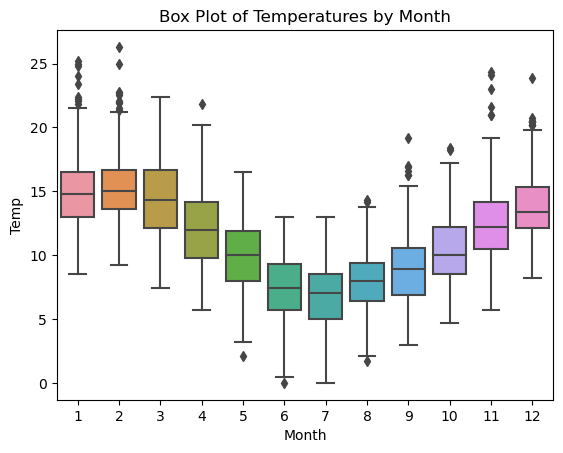

In [28]:
sns.boxplot(x='Month', y='Temp', data=data)


plt.title('Box Plot of Temperatures by Month')
plt.show()

## [5] 결과 시각화

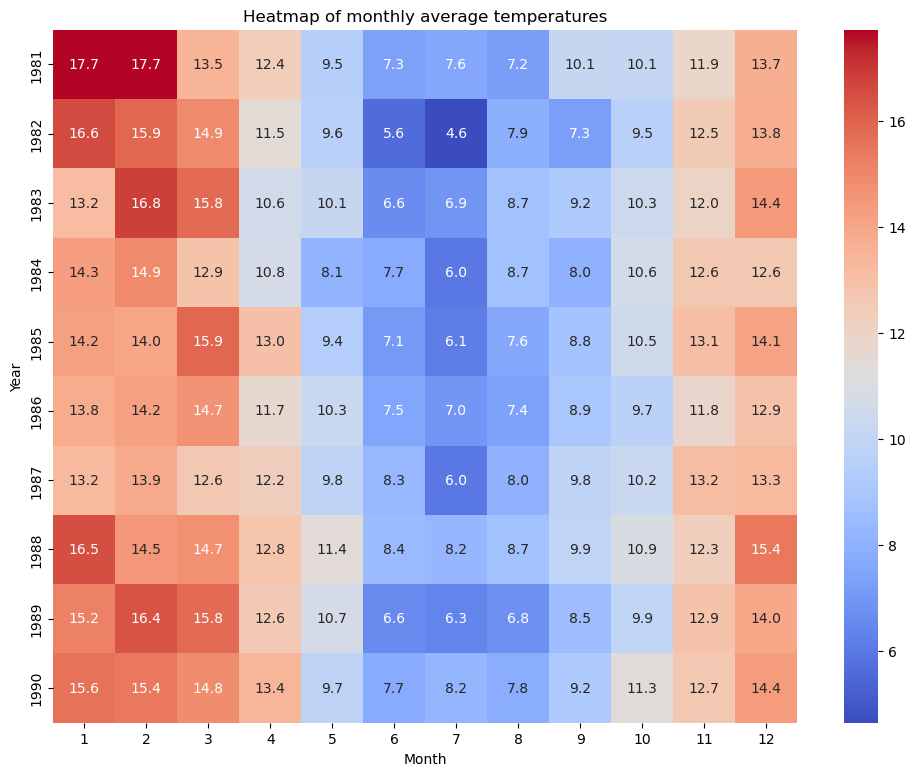

In [29]:
plt.figure(figsize=(12,9))

sns.heatmap(monthly_avg_temp,cmap='coolwarm',annot=True,fmt='.1f')

plt.title('Heatmap of monthly average temperatures')
plt.xlabel('Month')
plt.ylabel('Year')

plt.show()

## [6] 결론
- **장기적인 기온 상승 추세**: 이동 평균 분석을 통해 장기적으로 기온이 상승하는 추세가 관찰되었습니다.
- **이상치의 발견**: 산점도와 상자 그림 분석을 통해 몇몇 이상치가 식별되었습니다. 이들은 특별한 기후 현상이나 데이터 수집 오류일 수 있습니다.
- **계절적 패턴의 식별**: 월별 평균 기온 분석을 통해 강력한 계절적 패턴이 확인되었습니다. 특히, 여름과 겨울 기간의 기온 차이가 두드러졌습니다.